In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [38]:
import numpy as np

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [41]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\sales_des - Python.csv')

In [42]:
df

,Date,Sales
0,01/01/1990,2900
1,01/01/1991,2950
2,01/01/1992,3500
3,01/01/1993,3400
4,01/01/1994,3350
5,01/01/1995,3850
6,01/01/1996,3870
7,01/01/1997,3600
8,01/01/1998,3650
9,01/01/1999,3800


In [43]:
df=df.set_index("Date")

In [44]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)

<AxesSubplot:xlabel='Date'>

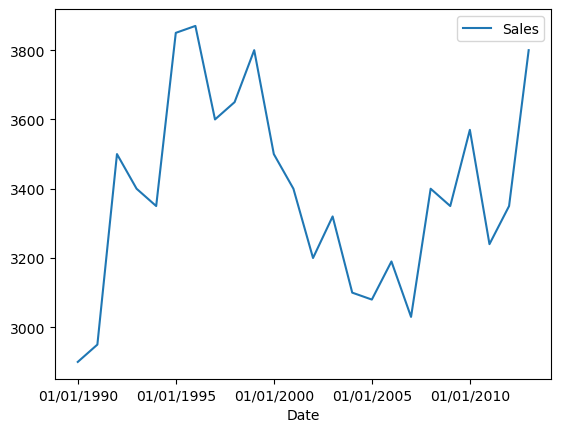

In [45]:
df.plot()

In [46]:
adfuller(train_df)

(-3.0487436995152564,
 0.03058634012625988,
 7,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 111.93244892532941)

In [47]:
model = Holt(train_df,initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
forecast = model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,18
Model:,Holt,SSE,934758.371
Optimized:,False,AIC,203.438
Trend:,Additive,BIC,207.000
Seasonal:,None,AICC,211.074
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:44:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [48]:
model = Holt(train_df,initialization_method="heuristic").fit(optimized=True)
forecast1 = model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,18
Model:,Holt,SSE,801170.514
Optimized:,True,AIC,200.662
Trend:,Additive,BIC,204.224
Seasonal:,None,AICC,208.299
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:44:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5316655,alpha,True
smoothing_trend,0.5114223,beta,True


In [49]:
model = Holt(train_df,initialization_method="estimated").fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,18
Model:,Holt,SSE,801170.514
Optimized:,True,AIC,200.662
Trend:,Additive,BIC,204.224
Seasonal:,None,AICC,208.299
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:44:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5316655,alpha,True
smoothing_trend,0.5114223,beta,True


In [50]:
fitted_values=model.fittedvalues
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)
fitted_values_df

,Fitted_Values
0,2920.705913
1,3109.098027
2,3180.652179
3,3593.411958
4,3680.965245
5,3605.394882
6,3902.344941
7,4043.255432
8,3845.175340
9,3725.921607


In [51]:
forecast_validation = model.forecast(6)
forecast_validation_df=pd.DataFrame(forecast_validation)
forecast_validation_df
forecast_validation_df.rename(columns = {0:'Forecast'}, inplace = True)
forecast_validation_df=forecast_validation_df.reset_index(drop=True)

In [52]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_validation_df])

In [53]:
fitted_forecast_df=fitted_forecast_df.reset_index(drop=True)

In [54]:
df_graph=df.reset_index(drop=True)
df_graph

,Sales
0,2900
1,2950
2,3500
3,3400
4,3350
5,3850
6,3870
7,3600
8,3650
9,3800


In [55]:
final_df=pd.concat([fitted_forecast_df,df_graph],axis=1)

In [56]:
final_df

,Fitted_Values,Forecast,Sales
0,2920.705913,NaN,2900
1,3109.098027,NaN,2950
2,3180.652179,NaN,3500
3,3593.411958,NaN,3400
4,3680.965245,NaN,3350
5,3605.394882,NaN,3850
6,3902.344941,NaN,3870
7,4043.255432,NaN,3600
8,3845.175340,NaN,3650
9,3725.921607,NaN,3800


In [57]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(final_df["Sales"],final_df["Forecast"])

14.759367308209805

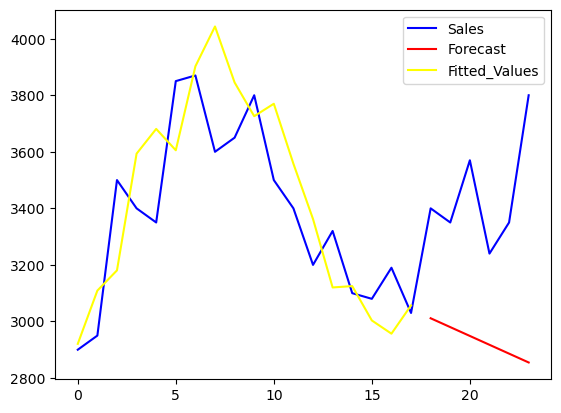

In [58]:
fig, ax = plt.subplots()
ax.plot(final_df["Sales"], label="Sales",color='blue')
ax.plot(final_df["Forecast"], label="Forecast",color='red')
ax.plot(final_df["Fitted_Values"], label="Fitted_Values",color='yellow')
ax.legend()

In [59]:
mp=model.params
mp

{'smoothing_level': 0.5316655186486062,
 'smoothing_trend': 0.5114223344510641,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2715.6751238093952,
 'initial_trend': 205.0307886969248,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
mp=model.params
smoothing_level = list(mp.values())[0]
smoothing_trend=list(mp.values())[1]

In [61]:
final_model = Holt(df).fit(smoothing_trend=smoothing_trend,smoothing_level=smoothing_level)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [62]:
final_model.summary()

Dep. Variable:,Sales,No. Observations:,24
Model:,Holt,SSE,1304415.288
Optimized:,True,AIC,269.677
Trend:,Additive,BIC,274.389
Seasonal:,None,AICC,274.618
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:44:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5316655,alpha,False
smoothing_trend,0.5114223,beta,False


In [63]:
forecast_future = final_model.forecast(10)

In [64]:
df_graph=df.reset_index(drop=True)

In [65]:
final=pd.concat([df_graph,forecast_future])

In [66]:
final.rename(columns = {0:'Forecast'}, inplace = True)

In [67]:
final=final.reset_index(drop=True)
final

,Sales,Forecast
0,2900.0,NaN
1,2950.0,NaN
2,3500.0,NaN
3,3400.0,NaN
4,3350.0,NaN
5,3850.0,NaN
6,3870.0,NaN
7,3600.0,NaN
8,3650.0,NaN
9,3800.0,NaN


In [68]:
date_range = pd.date_range(start='1990-01-01', periods=34,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)
date_range_df
final=pd.concat([final,date_range_df],axis=1)
final=final.set_index("Date")
final

,Sales,Forecast
Date,,
1990-01-01,2900.0,NaN
1990-02-01,2950.0,NaN
1990-03-01,3500.0,NaN
1990-04-01,3400.0,NaN
1990-05-01,3350.0,NaN
1990-06-01,3850.0,NaN
1990-07-01,3870.0,NaN
1990-08-01,3600.0,NaN
1990-09-01,3650.0,NaN


<AxesSubplot:xlabel='Date'>

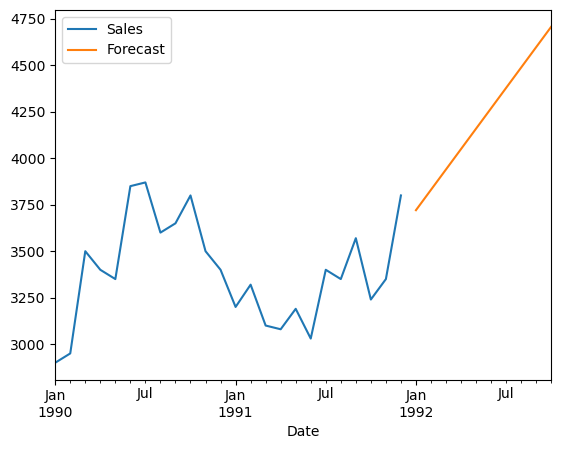

In [69]:
final.plot()